In [1]:
import json
import bz2
import regex
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
# import pprint

from tqdm import tqdm
from scipy import sparse
# from collections import Counter

import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')

# from natasha import *
from natasha import LocationExtractor

%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [13]:
responses = []
with bz2.BZ2File('/Users/aleksandr/Downloads/nlp-netology-master/2/banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [01:45, 1912.94it/s]


#  –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ –ø–æ NLP # 1 [100 –±–∞–ª–ª–æ–≤]
## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ 

–í —ç—Ç–æ–º –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤—ã –Ω–∞ –±–∞–Ω–∫–∏ —Å —Å–∞–π—Ç–∞ banki.ru. [–°—Å—ã–ª–∫–∞ –Ω–∞ –¥–∞–Ω–Ω—ã–µ](https://drive.google.com/open?id=1CPKtX5HcgGWRpzbWZ2fMCyqgHGgk21l2).

–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤, –Ω–µ–∫–æ—Ç–æ—Ä—É—é –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∞ —Ç–∞–∫–∂–µ –æ—Ü–µ–Ω–∫—É –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. 

–¢–µ–∫—Å—Ç—ã —Ö—Ä–∞–Ω—è—Ç—Å—è –≤ json-–∞—Ö –≤ –º–∞—Å—Å–∏–≤–µ responses.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä –æ—Ç–∑—ã–≤–∞:

In [14]:
responses[99]

{'city': '–≥. –°–∞—Ä–∞—Ç–æ–≤',
 'rating_not_checked': False,
 'title': '–ö–∞—Ä—Ç–∞ –∫–æ –≤–∫–ª–∞–¥—É',
 'num_comments': 0,
 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 880',
 'author': 'ronnichka',
 'bank_name': '–Æ–≥—Ä–∞',
 'datetime': '2015-06-03 20:56:57',
 'text': '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –•–æ—Ç–µ–ª–∞ –Ω–∞–ø–∏—Å–∞—Ç—å, —á—Ç–æ –º–Ω–µ –º–µ—Å—è—Ü –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É –∫–æ –≤–∫–ª–∞–¥—É, —Å—Å—ã–ª–∞—è—Å—å –Ω–∞ "–Ω–∞–º –∂–µ –∏—Ö –∏–∑ –°–∞–º–∞—Ä—ã –≤–µ–∑—É—Ç" (–Ω–∞ —Å–µ–∫—É–Ω–¥–æ—á–∫—É 5 —á–∞—Å–æ–≤ –µ–∑–¥—ã –æ—Ç –Ω–∞—à–µ–≥–æ –≥–æ—Ä–æ–¥–∞). –ù–æ! –ü—Ä–æ—á–∏—Ç–∞–ª–∞, —á—Ç–æ –ª—é–¥—è–º 3,5 –º–µ—Å—è—Ü–µ–≤ –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É, –∏ –ø–æ–Ω—è–ª–∞, —á—Ç–æ —É –º–µ–Ω—è –≤—Å–µ —Ö–æ—Ä–æ—à–æ, –ø–æ–∫–∞ —á—Ç–æ. –ò –ø–æ–¥–∞—Ä–æ–∫ –º–Ω–µ –¥–∞–ª–∏, –∏ –∫—É–ª–µ—Ä –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –µ—Å—Ç—å. –¢–∞–∫ —á—Ç–æ —è, –∫–æ–Ω–µ—á–Ω–æ, –≥–æ—Ç–æ–≤–∞ –∂–¥–∞—Ç—å. –ü—Ä–∞–≤–¥–∞ —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –Ω–µ –æ—á–µ–Ω—å –¥–æ–ª–≥–æ.',
 'rating_grade': 3}

## –ß–∞—Å—Ç—å 1. –ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏
2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö (–Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ)
3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
    * —Å–ª–æ–≤
    * —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
    * –ª–µ–º–º 
* —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö
4. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—É—é –¶–∏–ø—Ñ–∞
5. –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
    * –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
    * —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?
6. –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É $tf-idf$, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [15]:
data = pd.DataFrame(responses)
data.head(3)

author     bank_license        bank_name            city  \
0      uhnov1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
1      Foryou  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2  Vladimir84  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   

              datetime  num_comments  rating_grade  rating_not_checked  \
0  2015-06-08 12:50:54             0           NaN               False   
1  2015-06-08 11:09:57             0           NaN               False   
2  2015-06-05 20:14:28             1           NaN               False   

                                                text  \
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...   
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...   
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...   

                                           title  
0                                         –ñ–∞–ª–æ–±–∞  
1  –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω  
2                –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153499 entries, 0 to 153498
Data columns (total 10 columns):
author                153479 non-null object
bank_license          153498 non-null object
bank_name             153499 non-null object
city                  138325 non-null object
datetime              153499 non-null object
num_comments          153499 non-null int64
rating_grade          88658 non-null float64
rating_not_checked    153499 non-null bool
text                  153499 non-null object
title                 153499 non-null object
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 10.7+ MB


### 1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏

In [17]:
# –ë–∞–∑–∞ –≥–æ—Ä–æ–¥–æ–≤ –†–æ—Å—Å–∏–∏ –∏ –Ω–µ —Ç–æ–ª—å–∫–æ

# https://habr.com/ru/post/21949/
# http://download.geonames.org/export/dump/
# https://github.com/Legostaev/contry_region_city/

ct = pd.read_csv('/Users/aleksandr/Desktop/rocid.csv (copy 3)/city.csv', sep=';', encoding='cp1251')
ct.head()

city_id  country_id  region_id           name
0     4400        3159       4312         –ú–æ—Å–∫–≤–∞
1     4313        3159       4312      –ê–±—Ä–∞–º—Ü–µ–≤–æ
2     4314        3159       4312        –ê–ª–∞–±–∏–Ω–æ
3     4315        3159       4312      –ê–ø—Ä–µ–ª–µ–≤–∫–∞
4     4316        3159       4312  –ê—Ä—Ö–∞–Ω–≥–µ–ª—å—Å–∫–æ–µ

In [18]:
X_df1, Y_df2 = data.city, ct.name

speech_recognition = X_df1.to_list()
claim_list = Y_df2.to_list()

In [19]:
import Levenshtein

def n_sort(x=claim_list, y=speech_recognition):
    
    l = Levenshtein.distance
    c = []
    
    for i in y:
        b = sorted({r: l(i, r) for r in x}.items(), key = lambda x: x[1])[0]
        c.append(
            ['–í–≤–µ–ª–∏: "{}" - –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∏–º–µ–ª–∏ –≤–≤–∏–¥—É: "{}" - –ö–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ min –ø–æ–¥–±–æ—Ä–æ–≤: "{}"'.format(i, b[0], b[1])]
        ) 
   
    return c

In [20]:
n_sort(claim_list, speech_recognition[0:30])

[['–í–≤–µ–ª–∏: "–≥. –ú–æ—Å–∫–≤–∞" - –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∏–º–µ–ª–∏ –≤–≤–∏–¥—É: "–ú–æ—Å–∫–≤–∞" - –ö–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ min –ø–æ–¥–±–æ—Ä–æ–≤: "3"'],
 ['–í–≤–µ–ª–∏: "–≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫" - –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∏–º–µ–ª–∏ –≤–≤–∏–¥—É: "–ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫" - –ö–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ min –ø–æ–¥–±–æ—Ä–æ–≤: "3"'],
 ['–í–≤–µ–ª–∏: "–≥. –ú–æ—Å–∫–≤–∞" - –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∏–º–µ–ª–∏ –≤–≤–∏–¥—É: "–ú–æ—Å–∫–≤–∞" - –ö–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ min –ø–æ–¥–±–æ—Ä–æ–≤: "3"'],
 ['–í–≤–µ–ª–∏: "–≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å" - –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∏–º–µ–ª–∏ –≤–≤–∏–¥—É: "–°—Ç–∞–≤—Ä–æ–ø–æ–ª—å" - –ö–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ min –ø–æ–¥–±–æ—Ä–æ–≤: "3"'],
 ['–í–≤–µ–ª–∏: "–≥. –ß–µ–ª—è–±–∏–Ω—Å–∫" - –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∏–º–µ–ª–∏ –≤–≤–∏–¥—É: "–ß–µ–ª—è–±–∏–Ω—Å–∫" - –ö–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ min –ø–æ–¥–±–æ—Ä–æ–≤: "3"'],
 ['–í–≤–µ–ª–∏: "–≥. –ú–æ—Å–∫–≤–∞" - –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∏–º–µ–ª–∏ –≤–≤–∏–¥—É: "–ú–æ—Å–∫–≤–∞" - –ö–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ min –ø–æ–¥–±–æ—Ä–æ–≤: "3"'],
 ['–í–≤–µ–ª–∏: "–≥. –í–æ–ª–≥–æ–≥—Ä–∞–¥" 

**–õ–µ–≤–∏–Ω—à—Ç–µ–π–Ω —Ö–æ—Ä–æ—à–æ —Å–ø—Ä–∞–≤–∏–ª—Å—è —Å —Ç–µ–º —á—Ç–æ –∏ —Ç–∞–∫ –Ω–µ–ø–ª–æ—Ö–æ, –∞ –≤–æ—Ç —Å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–º–∏ –≤–µ—â–∞–º–∏ –ø–æ–¥–≤–µ–ª...**\
_'–í–≤–µ–ª–∏: "–≥. –§—Ä–æ–ª–æ–≤–æ (–í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª.)" - –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∏–º–µ–ª–∏ –≤–≤–∏–¥—É: "–°—É—Ä–≥—É—Ç (–°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª.)" - –ö–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ min –ø–æ–¥–±–æ—Ä–æ–≤: "17"'_

–î–∞–ª–µ–µ:
- –ü–æ–ø—Ä–æ–±—É—é –ø—Ä–∏–º–µ–Ω–∏—Ç—å –ù–∞—Ç–∞—à—É.

–¢–∞–∫–∂–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –≤—Å–µ –ø–æ—Ä—Ç—è—Ç –∑–∞–ø–∏—Å–∏ –≤ —Å–∫–æ–±–∫–∞—Ö –≤–æ–∑–º–æ–∂–Ω–æ —Å—Ç–æ–∏—Ç –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç –Ω–∏—Ö, –µ—Å–ª–∏ –ù–∞—Ç–∞—à–∞ –¥–∞—Å—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ö—É–∂–µ –õ–∏–≤–µ–Ω—à—Ç–µ–π–Ω–∞\
–í –∫—Ä–∞–π–Ω–µ–º —Å–ª—É—á–∞–µ –±—É–¥—É —É—Ä–µ–∑–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç, —Ç.–∫. –ø–æ–∂–µ—Ä—Ç–≤–æ–≤–∞—Ç—å –≤—ã–±—Ä–æ—Å–∞–º–∏ –∫—É–¥–∞ –ª—É—á—à–µ, —á–µ–º –ø—Ä–æ–¥–æ–ª–∂–∞—Ç—å —Å –Ω–∏–º–∏.

p.s. –î–∞—Ç–∞—Å–µ—Ç –≤–µ—Å—å–º–∞ –Ω–µ–ø—Ä–∏—è—Ç–Ω—ã–π, —Ç–∞–∫–æ–≥–æ —Ä–æ–¥–∞ –æ–ø–µ—á–∞—Ç–∫–∏ —Å—Ç–æ–∏—Ç –ø—Ä–∞–≤–∏—Ç—å –Ω–∞ —Å—Ç–∞–¥–∏–∏ —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö...

In [21]:
# from natasha import *
from natasha import LocationExtractor

def extract_city(text):
    if isinstance(text, str):
        extractor = LocationExtractor()
        matches = extractor(text)
        if len(matches) > 0:
            return matches[0].fact.name
        else:
            return None
    else:
        return None

In [22]:
cities = pd.DataFrame(data.city.unique(), columns=['orig_name'])
cities['clean_name'] = cities['orig_name'].apply(extract_city)

In [23]:
cities.head()

orig_name   clean_name
0       –≥. –ú–æ—Å–∫–≤–∞       –º–æ—Å–∫–≤–∞
1  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫  –Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫
2   –≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å   —Å—Ç–∞–≤—Ä–æ–ø–æ–ª—å
3    –≥. –ß–µ–ª—è–±–∏–Ω—Å–∫    —á–µ–ª—è–±–∏–Ω—Å–∫
4    –≥. –í–æ–ª–≥–æ–≥—Ä–∞–¥    –≤–æ–ª–≥–æ–≥—Ä–∞–¥

In [24]:
on = cities.orig_name.value_counts().sum()
cn = cities.clean_name.value_counts().sum()

print('\n{0}'.format(int(on-cn)))


1050


**–£–∂–µ –ª—É—á—à–µ, –ø–æ—Ç–µ—Ä—è 1050 –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–µ —Ç–∞–∫ –ø–ª–æ—Ö–æ.**

–î–æ–±–∞–≤–ª—è–µ–º –≤ –æ—Å–Ω–æ–≤–Ω–æ–π Data Set

In [25]:
data['clean_city'] = data['city'].replace(cities['orig_name'].tolist(), cities['clean_name'].str.title().tolist())

In [26]:
data.head(3)

author     bank_license        bank_name            city  \
0      uhnov1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
1      Foryou  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2  Vladimir84  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   

              datetime  num_comments  rating_grade  rating_not_checked  \
0  2015-06-08 12:50:54             0           NaN               False   
1  2015-06-08 11:09:57             0           NaN               False   
2  2015-06-05 20:14:28             1           NaN               False   

                                                text  \
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...   
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...   
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...   

                                           title   clean_city  
0                                         –ñ–∞–ª–æ–±–∞       –ú–æ—Å–∫–≤–∞  
1  –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫  
2                –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.       –ú–æ—Å–∫–≤–∞

–ü–æ—Å–º–æ—Ç—Ä–µ–≤ –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ –Ω–∞ –¥–∞–Ω–Ω—ã–µ —É —Å—Ç–æ–ª–±—Ü–∞ 'city' –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è None –∏ –∫–∞–∫ —Å–ª–µ–¥—Å—Ç–≤–∏–µ —É 'clean_city' —Ç–æ–∂–µ, —á—Ç–æ–±—ã –ø–æ—á–∏—Å—Ç–∏—Ç—å ds –æ—Ç –∞–Ω–æ–º–∞–ª–∏–π –æ—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –µ–≥–æ –ø–æ —ç—Ç–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É.

In [27]:
df_base = data.copy() # –∫–æ–ø–∏—è
df_isna = data[pd.isna(data.clean_city)] # —Ç—É—Ç NaN –ø–æ –≥–æ—Ä–æ–¥–∞–º

# –¥–∞–Ω–Ω—ã–µ –ø–æ –≥–æ—Ä–æ–¥–∞–º –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –≤ —Ä–∞–º–∫–∞—Ö –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã –±—É–¥—É –±—Ä–∞—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ –æ—á–∏—â–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø—É—Å—Ç—å –∏ –≤ —É–±—ã—Ç–æ–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É
df_notna = data[pd.notna(data.clean_city)]

In [40]:
# df_base.city.value_counts(dropna=False)

In [28]:
df_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 0 to 138946
Data columns (total 11 columns):
author                135079 non-null object
bank_license          135079 non-null object
bank_name             135080 non-null object
city                  135080 non-null object
datetime              135080 non-null object
num_comments          135080 non-null int64
rating_grade          73151 non-null float64
rating_not_checked    135080 non-null bool
text                  135080 non-null object
title                 135080 non-null object
clean_city            135080 non-null object
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [29]:
banks = df_notna.groupby(['bank_name']).count()['text'].sort_values(ascending=False).head(10)
rcParams['figure.figsize'] = 8, 6
plt.barh(banks.index[::-1],banks.values[::-1])
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –ë–∞–Ω–∫–∞–º')
plt.ylabel('Top 10')
plt.show()

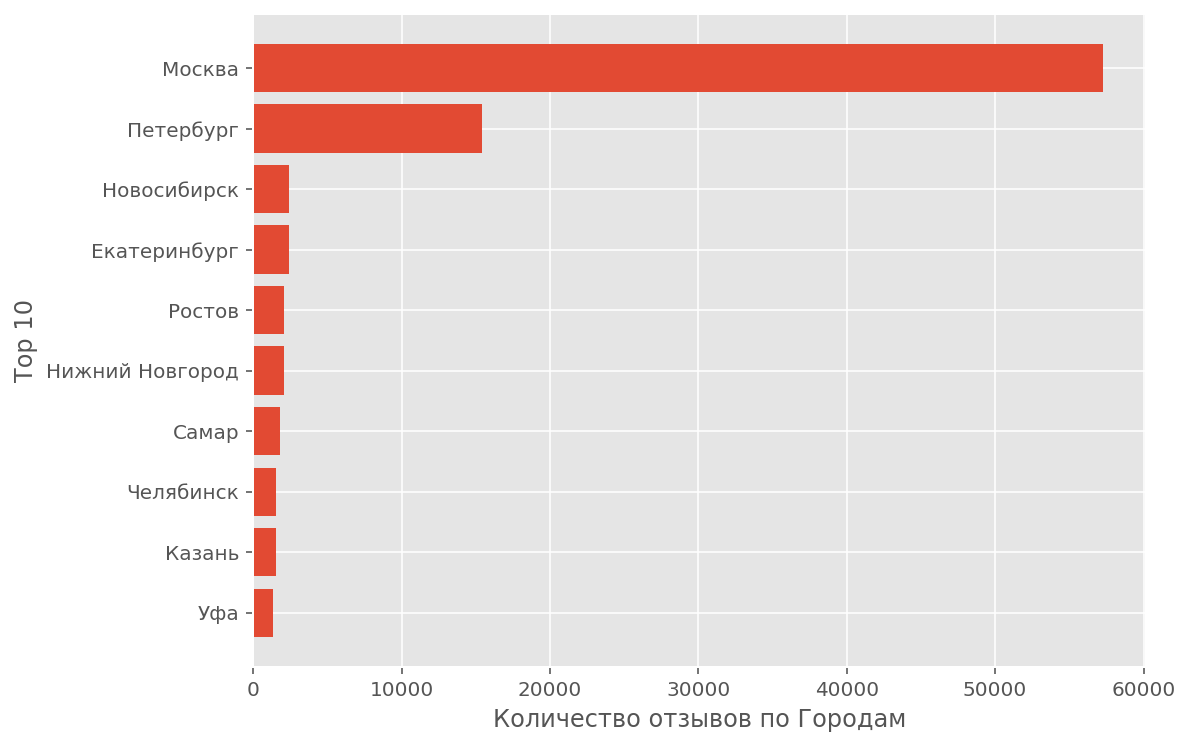

In [30]:
cities = df_notna.groupby(['clean_city']).count()['text'].sort_values(ascending=False).head(10)
rcParams['figure.figsize'] = 8, 6
plt.barh(cities.index[::-1],cities.values[::-1])
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –ì–æ—Ä–æ–¥–∞–º')
plt.ylabel('Top 10')
plt.show()

–°—Ç–æ–∏—Ç –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤—É –∏ –ü–∏—Ç–µ—Ä —Å—Ç–æ–∏—Ç —Å—á–∏—Ç–∞—Ç—å –∫–∞–∫ –∞–Ω–æ–º–∞–ª–∏—é –≤ –¥–∞–Ω–Ω—ã—Ö, —Å—Ç–æ–ª–∏—Ü—É —è –±—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª –æ—Ç–¥–µ–ª—å–Ω–æ –æ—Ç –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –≥–æ—Ä–æ–¥–æ–≤. –¢–∞–∫–∂–µ –≤ ds –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç Time series —á—Ç–æ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ –¥–∞–Ω–Ω—ã–µ –º—É–ª—å—Ç–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å... –æ–ø—É—Å—Ç–∏–º –≤ —ç—Ç–æ–π —Ä–∞–±–æ—Ç–µ –Ω–æ —è –±—ã –±—Ä–∞–ª –¥–∞–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ –∑–∞ –∫—Ä–∞–π–Ω–∏–µ 2-3 –≥–æ–¥–∞. –í–æ–∑–º–æ–∂–Ω—ã–µ —Ñ–∏—á–∏: –≥–æ–¥, –º–µ—Å—è—Ü, –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏, –≤—Ä–µ–º—è.

### 2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö (–Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ)

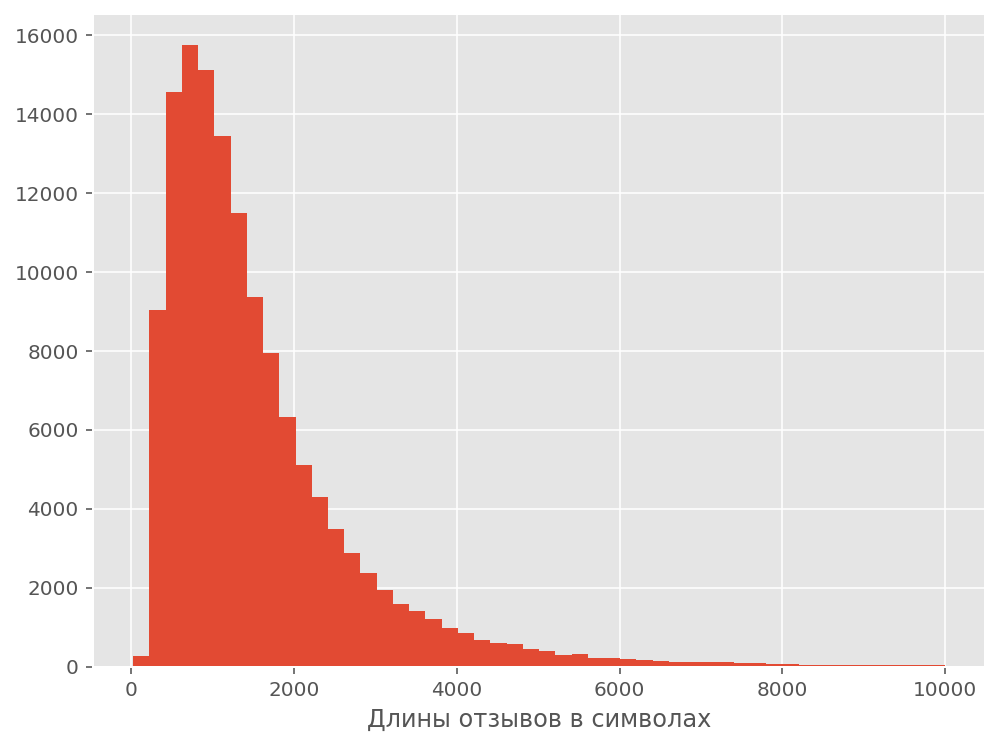

In [31]:
len_c = df_notna.text.apply(len)
rcParams['figure.figsize'] = 8, 6
len_c[len_c<10000].plot(kind='hist',bins=50)
plt.xlabel('–î–ª–∏–Ω—ã –æ—Ç–∑—ã–≤–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö')
plt.ylabel('')
plt.show()

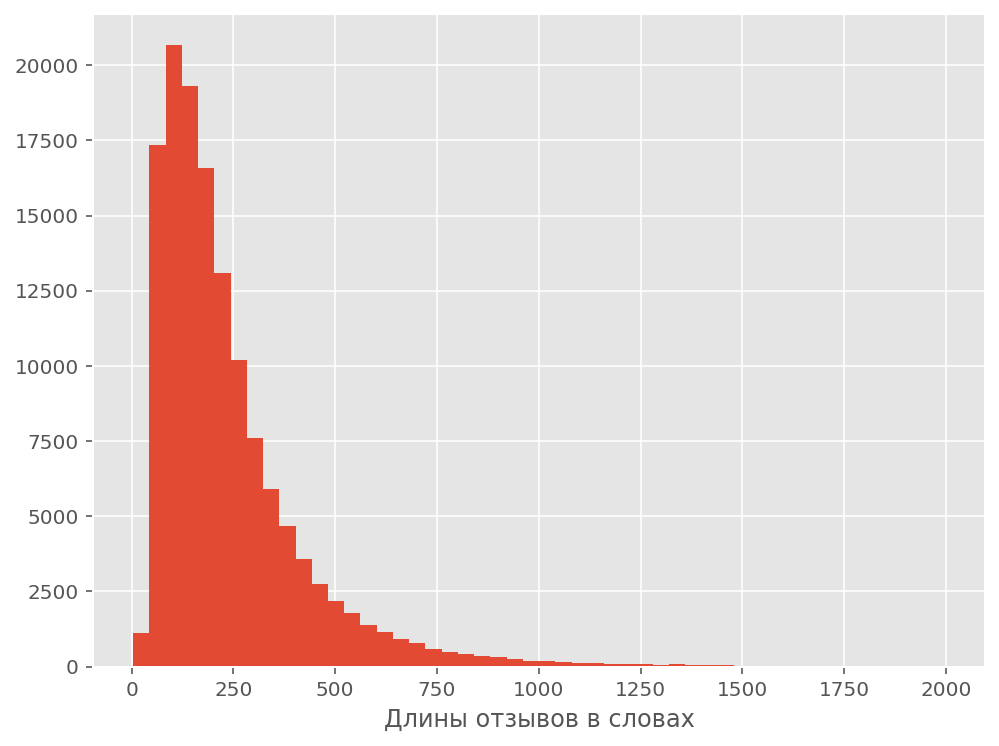

In [32]:
len_t = df_notna.text.str.split().apply(len)
rcParams['figure.figsize'] = 8, 6
len_t[len_t<2000].plot(kind='hist',bins=50)
plt.xlabel('–î–ª–∏–Ω—ã –æ—Ç–∑—ã–≤–æ–≤ –≤ —Å–ª–æ–≤–∞—Ö')
plt.ylabel('')
plt.show()

### 3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
- —Å–ª–æ–≤
- —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
- –ª–µ–º–º
- —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö

#### –°–ª–æ–≤–∞

In [34]:
regex = re.compile("[–ê-–Ø–∞-—è]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [35]:
df = df_notna.copy()
df['text_tokinized'] =  df.text.str.lower().apply(words_only)

In [37]:
from tqdm import tqdm_notebook as tqdm
from collections import Counter

cnt = Counter()
n_types = []
n_tokens = []
tokens = []

for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = row['text_tokinized'].split()
    cnt.update(tokens)
    n_types.append(len(cnt))
    n_tokens.append(sum(list(cnt.values())))

for i in cnt.most_common(10):
    print(i)


('–≤', 1184949)
('–∏', 941477)
('–Ω–µ', 763476)
('–Ω–∞', 630821)
('—á—Ç–æ', 571135)
('—è', 517705)
('—Å', 415119)
('–ø–æ', 335326)
('–º–Ω–µ', 288927)
('–±–∞–Ω–∫–∞', 250482)


#### C–ª–æ–≤–∞ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤

In [38]:
from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')

mystopwords = stopwords.words('russian') + ['—ç—Ç–æ', '–Ω–∞—à' , '—Ç—ã—Å', '–º–ª–Ω', '–º–ª—Ä–¥', '—Ç–∞–∫–∂–µ', '—Ç', '–¥', '–≥']
def remove_stopwords(text, mystopwords=mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [39]:
df['text_tokinized_stop_worlds'] = df.text_tokinized.str.lower().apply(remove_stopwords)

In [40]:
df.head(3)

author     bank_license        bank_name            city  \
0      uhnov1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
1      Foryou  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2  Vladimir84  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   

              datetime  num_comments  rating_grade  rating_not_checked  \
0  2015-06-08 12:50:54             0           NaN               False   
1  2015-06-08 11:09:57             0           NaN               False   
2  2015-06-05 20:14:28             1           NaN               False   

                                                text  \
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...   
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...   
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...   

                                           title   clean_city  \
0                                         –ñ–∞–ª–æ–±–∞       –ú–æ—Å–∫–≤–∞   
1  –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2                –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.       –ú–æ—Å–∫–≤–∞   

                                      text_tokinized  \
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É...   
1  –¥–æ–±—Ä–æ–≥–æ –¥–Ω—è —è–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç...   
2  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –¥—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç –≤ –¥–æ –º...   

                          text_tokinized_stop_worlds  
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º...  
1  –¥–æ–±—Ä–æ–≥–æ –¥–Ω—è —è–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç...  
2  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –¥—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –º–æ–∂–∞–π—Å–∫–∏–π...

In [41]:
cnt = Counter()
n_types = []
n_tokens = []
tokens = []
tokens_all=[]

for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = row['text_tokinized_stop_worlds'].split()
    tokens_all+=tokens
    cnt.update(tokens)
    n_types.append(len(cnt))
    n_tokens.append(sum(cnt.values()))
    
for i in cnt.most_common(10):
    print(i)


('–±–∞–Ω–∫–∞', 250482)
('–±–∞–Ω–∫', 194099)
('–¥–µ–Ω—å–≥–∏', 117318)
('–∫–∞—Ä—Ç—É', 95830)
('–∫–∞—Ä—Ç—ã', 93528)
('–∫—Ä–µ–¥–∏—Ç', 70968)
('–¥–µ–Ω—å', 68913)
('–∑–∞—è–≤–ª–µ–Ω–∏–µ', 64535)
('–±–∞–Ω–∫–µ', 64044)
('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 59582)


('–≥', 61082) - –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω–æ. —Å—á–∏—Ç–∞–ª–æ—Å—å 30+ –º–∏–Ω—É—Ç\
–î–∞–ª–µ–µ —Å–¥–µ–ª–∞–ª –ø–µ—Ä–µ—Å—á–µ—Ç —Å + '–≥' –≤ —Å—Ç–æ–ø —Å–ª–æ–≤–∞—Ö

–±–∞–Ω–∫–∞, –±–∞–Ω–∫, –±–∞–Ω–∫–µ - –õ–µ–º–º—ã –¥–æ–ª–∂–Ω—ã —É–ª—É—á—à–∏—Ç—å –¥–∞–Ω–Ω—ã–µ

#### –õ–µ–º–º—ã

In [42]:
from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem

In [43]:
m = Mystem()

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [44]:
mystoplemmas = stopwords.words('russian') + ['–∫–æ—Ç–æ—Ä—ã–π','–ø—Ä–æ—à–ª—ã–π','—Å–µ–π', '—Å–≤–æ–π', '–Ω–∞—à', '–º–æ—á—å', '–≥']

def remove_stoplemmas(text, mystoplemmas=mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

In [45]:
df['lemma'] = df['text_tokinized_stop_worlds'].apply(lemmatize)

In [46]:
df.head(3)

author     bank_license        bank_name            city  \
0      uhnov1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
1      Foryou  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2  Vladimir84  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   

              datetime  num_comments  rating_grade  rating_not_checked  \
0  2015-06-08 12:50:54             0           NaN               False   
1  2015-06-08 11:09:57             0           NaN               False   
2  2015-06-05 20:14:28             1           NaN               False   

                                                text  \
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...   
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...   
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...   

                                           title   clean_city  \
0                                         –ñ–∞–ª–æ–±–∞       –ú–æ—Å–∫–≤–∞   
1  –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2                –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.       –ú–æ—Å–∫–≤–∞   

                                      text_tokinized  \
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É...   
1  –¥–æ–±—Ä–æ–≥–æ –¥–Ω—è —è–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç...   
2  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –¥—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç –≤ –¥–æ –º...   

                          text_tokinized_stop_worlds  \
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º...   
1  –¥–æ–±—Ä–æ–≥–æ –¥–Ω—è —è–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç...   
2  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –¥—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –º–æ–∂–∞–π—Å–∫–∏–π...   

                                               lemma  
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è–≤–ª—è—Ç—å—Å—è –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫ –ø–æ—Ä—É—á–∏—Ç–µ–ª—å –∫—Ä...  
1  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è–≤–ª—è—Ç—å—Å—è –¥–µ—Ä–∂–∞—Ç–µ–ª—å –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç...  
2  –∑–¥—Ä–∞–≤—Å—Ç–≤–æ–≤–∞—Ç—å –¥—É–±–ª–∏—Ä–æ–≤–∞—Ç—å —Å–≤–æ–π –∑–∞—è–≤–ª–µ–Ω–∏–µ –º–æ–∂–∞–π...

In [47]:
cnt = Counter()
n_types = []
n_tokens = []
tokens = []
tokens_all=[]

for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = row['lemma'].split()
    cnt.update(tokens)
    n_types.append(len(cnt))
    tokens_all+=tokens
    n_tokens.append(sum(cnt.values()))
    
for i in cnt.most_common(10):
    print(i)


('–±–∞–Ω–∫', 560845)
('–∫–∞—Ä—Ç–∞', 304772)
('–¥–µ–Ω—å–≥–∏', 160389)
('–¥–µ–Ω—å', 155099)
('–º–æ–π', 148714)
('–∫—Ä–µ–¥–∏—Ç', 137617)
('–∫–æ—Ç–æ—Ä—ã–π', 134031)
('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 127724)
('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 122619)
('–∫–ª–∏–µ–Ω—Ç', 121659)


#### –°—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ

In [48]:
def to_nouns(text, mystem=m):
    m=MorphAnalyzer()
    try:
        return " ".join([noun for noun in text.split() if m.parse(noun)[0].tag.POS =='NOUN'])
    except:
        return []

to_nouns(df.lemma.iloc[1])

'–¥–µ–Ω—å –¥–µ—Ä–∂–∞—Ç–µ–ª—å –∫–∞—Ä—Ç–∞ —Å–±–µ—Ä–±–∞–Ω–∫ —Ä–æ—Å—Å–∏—è –≥–æ–¥ —Ñ–∞–º–∏–ª–∏—è –±–∞–Ω–∫ –¥–æ–∫—É–º–µ–Ω—Ç –∫–æ–ø–∏—è –ø–∞—Å–ø–æ—Ä—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ –±—Ä–∞–∫ –∫–∞—Ä—Ç–∞ —Ñ–∞–º–∏–ª–∏—è –º—É–∂ —Ç–æ–∫–∞—Ä–µ–≤–∞ –º–∞—Ä–∏—è –∞–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤–Ω–∞ —Å–µ–∫–ª–µ—Ç–∏–Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å —É—Å–ª—É–≥–∞ —Å–±–µ—Ä–±–∞–Ω–∫ —Å—Ç—Ä–∞–Ω–∏—Ü–∞ –∫–∞—Ä—Ç–∞ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ—Ç–¥–µ–ª–µ–Ω–∏–µ —Å–±–µ—Ä–±–∞–Ω–∫ –±–∞–∑–∞ –±–∞–Ω–∫ —Ñ–∞–º–∏–ª–∏—è —Å–µ–∫–ª–µ—Ç–∏–Ω–∞ —Å–∫–∞–Ω –¥–æ–∫—É–º–µ–Ω—Ç –∫–æ–Ω—Ç–∞–∫—Ç –∑–≤–æ–Ω–æ–∫ —á –≤—Ä–µ–º—è —Å–∏—Ç—É–∞—Ü–∏—è –±–∞–∑–∞ —Å–µ–∫–ª–µ—Ç–∏–Ω–∞ –∫–∞—Ä—Ç–∞ —Ñ–∞–º–∏–ª–∏—è —Ç–æ–∫–∞—Ä–µ–≤–∞ —Å–≤—è–∑—å –∏—Å—Ç–µ—á–µ–Ω–∏–µ —Å—Ä–æ–∫ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç –∫–æ–ø–∏—è –ø–∞—Å–ø–æ—Ä—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ –±—Ä–∞–∫ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–æ–ª—å —Å–∏—Ç—É–∞—Ü–∏—è —É–≤–∞–∂–µ–Ω–∏–µ —Ç–æ–∫–∞—Ä–µ–≤ –º–∞—Ä–∏—è –∞–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤–Ω–∞'

In [49]:
from multiprocessing import Pool

with Pool() as p:
    df['nouns']=p.map(to_nouns,df.lemma)

In [50]:
cnt_noun = Counter()
n_types_noun = []
n_tokens_noun= []
tokens_noun = []
tokens_all_noun=[]

for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = row['nouns'].split()
    cnt_noun.update(tokens)
    n_types_noun.append(len(cnt))
    tokens_all_noun+=tokens
    n_tokens_noun.append(sum(cnt.values()))

for i in cnt_noun.most_common(10):
    print(i)


('–±–∞–Ω–∫', 560845)
('–∫–∞—Ä—Ç–∞', 304772)
('–¥–µ–Ω—å–≥–∏', 160389)
('–¥–µ–Ω—å', 155099)
('–∫—Ä–µ–¥–∏—Ç', 137617)
('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 127724)
('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 122619)
('–∫–ª–∏–µ–Ω—Ç', 121659)
('—Å—á–µ—Ç', 112766)
('—Å—É–º–º–∞', 100614)


### 4. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—É—é –¶–∏–ø—Ñ–∞

In [51]:
freqs = list(cnt.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(freqs[:300], range(300))
plt.xlabel('–ù–æ–º–µ—Ä —Å–ª–æ–≤–∞')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞ —Å–ª–æ–≤–∞')
plt.title('–ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞')
plt.show()

In [53]:
# fig, ax = plt.subplots(figsize=(12,4))
# ax.plot(n_tokens,n_types)
# plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ  —Ç–æ–∫–µ–Ω–æ–≤')
# plt.ylabel('–ß–∏—Å–ª–æ —Å–ª–æ–≤')
# plt.title('–ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞')
# plt.show()

### 5. –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
- –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
- —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?

In [54]:
from nltk import FreqDist
Freq_Dist = FreqDist(tokens_all)

In [57]:
print('–°–ª–æ–≤–æ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -"',Freq_Dist['—Å–æ—Ç—Ä—É–¥–Ω–∏–∫'],'—Ä–∞–∑')
print('–°–ª–æ–≤–æ "–∫–ª–∏–µ–Ω—Ç" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -"',Freq_Dist['–∫–ª–∏–µ–Ω—Ç'],'—Ä–∞–∑')

–°–ª–æ–≤–æ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -" 122619 —Ä–∞–∑
–°–ª–æ–≤–æ "–∫–ª–∏–µ–Ω—Ç" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -" 121659 —Ä–∞–∑


–°–ª–æ–≤ "–∫–ª–∏–µ–Ω—Ç" > –°–ª–æ–≤ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫"

In [58]:
print('–°–ª–æ–≤–æ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -"',Freq_Dist['–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ'],'—Ä–∞–∑')
print('–°–ª–æ–≤–æ "–¥–æ–≤–µ—Ä–∏–µ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -"',Freq_Dist['–¥–æ–≤–µ—Ä–∏–µ'],'—Ä–∞–∑')

–°–ª–æ–≤–æ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -" 3046 —Ä–∞–∑
–°–ª–æ–≤–æ "–¥–æ–≤–µ—Ä–∏–µ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -" 1884 —Ä–∞–∑


–°–ª–æ–≤ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" > –°–ª–æ–≤ "–¥–æ–≤–µ—Ä–∏–µ"

### 6. –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É ùë°ùëì‚àíùëñùëëùëì , –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [64]:
df['rating_grade'].value_counts()

1.0    39026
2.0    12995
5.0    10273
3.0     7362
4.0     3495
Name: rating_grade, dtype: int64

–°–±–∞–ª–∞–Ω—Å–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫–∏

In [65]:
num=10000

df_sample = df[(df.rating_grade==1)].sample(n=num).copy()
df_sample = df_sample.append(df[(df.rating_grade==5)].sample(n=num))

df_sample.rating_grade.value_counts()

5.0    10000
1.0    10000
Name: rating_grade, dtype: int64

In [66]:
tokens_by_topic = []

for rating in df_sample.rating_grade.unique():
    tokens=[]
    sample=df_sample[df_sample['rating_grade']==rating]
    
    for i in range(len(sample)):
        tokens += sample.lemma.iloc[i].split()
        
    tokens_by_topic.append(tokens)

In [68]:
df_sample.head(3)

author     bank_license                  bank_name  \
119921  andrey_egorov  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3292             –†–∞–π—Ñ—Ñ–∞–π–∑–µ–Ω–±–∞–Ω–∫   
89328        *Galina*  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623                     –í–¢–ë 24   
48436    –ù–µ –∫–ª–∏–µ–Ω—Çkzn  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3279  –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ë–∞–Ω–∫ ¬´–¢—Ä–∞—Å—Ç¬ª   

                      city             datetime  num_comments  rating_grade  \
119921  –≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥  2011-09-02 15:42:00             6           1.0   
89328       –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫  2013-03-04 09:21:00             1           1.0   
48436            –≥. –ö–∞–∑–∞–Ω—å  2014-05-05 19:21:00             2           1.0   

        rating_not_checked                                               text  \
119921               False  –ü—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
89328                False  –ü–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä...   
48436                False  –°–æ–≥–ª–∞—Å–Ω–∞ —Å–æ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏...   

                                            title   clean_city  \
119921  "–ú—ã –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–ª–∏, –Ω–æ –ø–æ—á–µ–º—É - –Ω–µ –∑–Ω–∞–µ–º!"    –ü–µ—Ç–µ—Ä–±—É—Ä–≥   
89328                 –û—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
48436                             –ó–≤–æ–Ω–∫–∏ –∏–∑ –±–∞–Ω–∫–∞       –ö–∞–∑–∞–Ω—å   

                                           text_tokinized  \
119921  –ø—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
89328   –ø–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä...   
48436   —Å–æ–≥–ª–∞—Å–Ω–∞ —Å–æ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏...   

                               text_tokinized_stop_worlds  \
119921  –ø—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
89328   –ø–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä–µ–¥–∏...   
48436   —Å–æ–≥–ª–∞—Å–Ω–∞ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏ –Ω–µ...   

                                                    lemma  \
119921  –ø—Ä–æ—Å–∏—Ç—å –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ...   
89328   –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–∫–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏–π –∫—Ä–µ–¥...   
48436   —Å–æ–≥–ª–∞—Å–Ω—ã–π –≤—Å–µ —Ä–∞–Ω–Ω–∏–π –æ—Å—Ç–∞–≤–ª—è—Ç—å –æ—Ç–∑—ã–≤ –Ω–µ–∫–æ–º–ø–µ—Ç–µ...   

                                                    nouns  
119921  –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞—â–µ–Ω–∏–µ –æ–±—Ä–∞—â–µ–Ω–∏–µ –±–∞–Ω–∫ –∞–≤–≥—É—Å—Ç...  
89328   –∑–∞—è–≤–∫–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –º–æ—Å–∫–≤–∞ –∞–Ω–∫–µ—Ç–∞...  
48436   —Å–æ–≥–ª–∞—Å–Ω—ã–π –æ—Ç–∑—ã–≤ —Ä–∞–±–æ—Ç–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ —Ü–µ–Ω—Ç—Ä –¥–∏—Ä–µ–∫—Ü–∏...

#### –£–Ω–∏–≥—Ä–∞–º–º—ã

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking_5 = []
tfidf_ranking_1 = []
dense = tfidf_matrix.todense()

text = dense[1].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_5.append(phrase)
    
text = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_1.append(phrase)

In [70]:
rank = pd.DataFrame({'tfidf_ranking_5': tfidf_ranking_5,'tfidf_ranking_1': tfidf_ranking_1})
rank.head(10)

tfidf_ranking_5 tfidf_ranking_1
0            –±–∞–Ω–∫            –±–∞–Ω–∫
1           –∫–∞—Ä—Ç–∞           –∫–∞—Ä—Ç–∞
2           –æ—á–µ–Ω—å          –¥–µ–Ω—å–≥–∏
3          –∫–ª–∏–µ–Ω—Ç            –¥–µ–Ω—å
4            –¥–µ–Ω—å             –º–æ–π
5       —Å–æ—Ç—Ä—É–¥–Ω–∏–∫       –æ—Ç–¥–µ–ª–µ–Ω–∏–µ
6          –∫—Ä–µ–¥–∏—Ç       —Å–æ—Ç—Ä—É–¥–Ω–∏–∫
7         –∫–æ—Ç–æ—Ä—ã–π         –∫–æ—Ç–æ—Ä—ã–π
8       –æ—Ç–¥–µ–ª–µ–Ω–∏–µ          –∫—Ä–µ–¥–∏—Ç
9           –≤–∫–ª–∞–¥            —Å—á–µ—Ç

–£–±–∏—Ä–∞–µ–º –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è

In [73]:
rank['tfidf_ranking_5_without_1']=rank.tfidf_ranking_5[~rank.tfidf_ranking_5.isin(rank.tfidf_ranking_1)]
rank['tfidf_ranking_1_without_5']=rank.tfidf_ranking_1[~rank.tfidf_ranking_1.isin(rank.tfidf_ranking_5)]

In [78]:
rank.iloc[:,-2:].dropna()

tfidf_ranking_5_without_1 tfidf_ranking_1_without_5
20              –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ                     –æ—Ç–≤–µ—Ç
30                    –±—ã—Å—Ç—Ä–æ                     –Ω–æ–º–µ—Ä
32                  –∏–Ω—Ç–µ—Ä–Ω–µ—Ç                  –Ω–∞–ø–∏—Å–∞—Ç—å
36                     –±–∞–Ω–∫–∞                       –≤–∞—à
38                   –æ—á–µ—Ä–µ–¥—å                  —Å—Ä–µ–¥—Å—Ç–≤–æ
39                 –æ—Ç–∫—Ä—ã–≤–∞—Ç—å                  –æ—Ç–≤–µ—á–∞—Ç—å
45                   —Ö–æ—Ä–æ—à–∏–π                    –∑–≤–æ–Ω–æ–∫
59                     —Å–∞–º—ã–π                  –æ–ø–µ—Ä–∞—Ü–∏—è
63                  –ø–æ–º–æ–≥–∞—Ç—å                    –¥–∞–≤–∞—Ç—å
67                        –≤—Å                     –∑–Ω–∞—Ç—å
69                   –¥–µ–≤—É—à–∫–∞                      –±—ã—Ç—å

#### –ë–∏–≥—Ä–∞–º–º—ã

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking_rank_is_5 = []
tfidf_ranking_rank_is_1 = []
dense = tfidf_matrix.todense()

text = dense[1].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_rank_is_5.append(phrase)
    
text = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_rank_is_1.append(phrase) 

In [81]:
rankings = pd.DataFrame({'tfidf_ranking_rank_is_5': tfidf_ranking_rank_is_5,'tfidf_ranking_rank_is_1': tfidf_ranking_rank_is_1})
rankings.head(10)

tfidf_ranking_rank_is_5 tfidf_ranking_rank_is_1
0           –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –±–∞–Ω–∫          —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫
1             –¥—Ä—É–≥–æ–π –±–∞–Ω–∫       –¥–µ–Ω–µ–∂–Ω—ã–π —Å—Ä–µ–¥—Å—Ç–≤–æ
2          —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫          –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫
3         –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –∫–∞—Ä—Ç–∞         –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –∫–∞—Ä—Ç–∞
4             –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫      –Ω–∞–ø–∏—Å–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ
5         –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –≤–∫–ª–∞–¥           –≥–æ—Ä—è—á–∏–π –ª–∏–Ω–∏—è
6          –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫              –∫–æ–ª–ª —Ü–µ–Ω—Ç—Ä
7         —è–≤–ª—è—Ç—å—Å—è –∫–ª–∏–µ–Ω—Ç            —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å
8          —Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å           –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –±–∞–Ω–∫
9             –¥–æ–±—Ä—ã–π –¥–µ–Ω—å        —Å–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∞

In [82]:
rankings['tfidf_ranking_rank_is_5_without_1']=rankings.tfidf_ranking_rank_is_5[~rankings.tfidf_ranking_rank_is_5.isin(rankings.tfidf_ranking_rank_is_1)]
rankings['tfidf_ranking_rank_is_1_without_5']=rankings.tfidf_ranking_rank_is_1[~rankings.tfidf_ranking_rank_is_1.isin(rankings.tfidf_ranking_rank_is_5)]

In [83]:
rankings.iloc[:,-2:].dropna()

tfidf_ranking_rank_is_5_without_1 tfidf_ranking_rank_is_1_without_5
13            –≤—ã—Ä–∞–∂–∞—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å                          —Å–µ–π –ø–æ—Ä–∞
19                  –ø—Ä–∏—è—Ç–Ω–æ —É–¥–∏–≤–ª—è—Ç—å                    –ø–æ–ª—É—á–∞—Ç—å –æ—Ç–≤–µ—Ç
22                        –±–∞–Ω–∫ –æ—á–µ–Ω—å                  –ø–∏—Å–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ
24                         –≥–æ–¥ –Ω–∞–∑–∞–¥                      —Ç–µ—á–µ–Ω–∏–µ –¥–µ–Ω—å
25                   –æ—á–µ–Ω—å –¥–æ–≤–æ–ª—å–Ω—ã–π                     –Ω–æ–º–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω
26                        –º–æ–π –≤–æ–ø—Ä–æ—Å              –æ–±—Ä–∞—â–∞—Ç—å—Å—è –æ—Ç–¥–µ–ª–µ–Ω–∏–µ
30                   –±–æ–ª—å—à–æ–π —Å–ø–∞—Å–∏–±–æ                     –º–æ–π –∑–∞—è–≤–ª–µ–Ω–∏–µ
34                  –æ–≥—Ä–æ–º–Ω—ã–π —Å–ø–∞—Å–∏–±–æ                        –º–æ–π –¥–µ–Ω—å–≥–∏
36                       —É—Å–ª—É–≥–∞ –±–∞–Ω–∫                    —Å–Ω–∏–º–∞—Ç—å –¥–µ–Ω—å–≥–∏
37                       –±–∞–Ω–∫ –º–æ—Å–∫–≤–∞                  –ø–æ–≥–∞—à–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç
39             –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ                       —Å–≤–æ–π –¥–µ–Ω—å–≥–∏
42                     –æ—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ                      –¥–µ–Ω—å–≥–∏ –∫–∞—Ä—Ç–∞
45                          –±–∞–Ω–∫ –≥–æ–¥                            —Å—á —Ç–æ—Ç
47                    –æ—Ç–∫—Ä—ã—Ç–∏–µ –≤–∫–ª–∞–¥                     –≤–æ–ø—Ä–æ—Å –ø–æ—á–µ–º—É
49                        –∫–∞—Ä—Ç–∞ –±–∞–Ω–∫                –µ–∂–µ–º–µ—Å—è—á–Ω—ã–π –ø–ª–∞—Ç–µ–∂
50                      –º–æ—á—å —Å–∫–∞–∑–∞—Ç—å               –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –æ—Ç–¥–µ–ª–µ–Ω–∏–µ
51                     –æ—á–µ–Ω—å —É–¥–æ–±–Ω—ã–π                     –∫–∞—Ä—Ç–∞ –∫–æ—Ç–æ—Ä—ã–π
52                      –ø—Ä–æ–¥—É–∫—Ç –±–∞–Ω–∫                    –º–æ–±–∏–ª—å–Ω—ã–π –±–∞–Ω–∫
54                    —Ö–æ—Ç–µ—Ç—å —Å–∫–∞–∑–∞—Ç—å                   –¥–∞–Ω–Ω—ã–π —Å–∏—Ç—É–∞—Ü–∏—è
57              —Ö–æ—Ç–µ—Ç—å –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å                      –∑–≤–æ–Ω–∏—Ç—å –±–∞–Ω–∫
62                        –∫–∞–∫–æ–π –ª–∏–±–æ                   —Å–±–µ—Ä–±–∞–Ω–∫ —Ä–æ—Å—Å–∏—è
63                   –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–∫–∞                –∑–∞—è–≤–ª–µ–Ω–∏–µ –∑–∞–∫—Ä—ã—Ç–∏–µ
64         –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ                      –≤–∑—è—Ç—å –∫—Ä–µ–¥–∏—Ç
65                  –∏–ø–æ—Ç–µ—á–Ω—ã–π –∫—Ä–µ–¥–∏—Ç                      –±–∞–Ω–∫ —Å–∫–∞–∑–∞—Ç—å
66                    –æ—Ç–∫—Ä—ã–≤–∞—Ç—å —Å—á–µ—Ç                –Ω–∞–ø–∏—Å–∞—Ç—å –ø—Ä–µ—Ç–µ–Ω–∑–∏—è
67                       —Ö–æ—É–º –∫—Ä–µ–¥–∏—Ç                           –ø–∏–Ω –∫–æ–¥
68                 –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è                   –º–æ–ª–æ–¥–æ–π —á–µ–ª–æ–≤–µ–∫

## –ß–∞—Å—Ç—å 2. –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ [20/100]

1. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º —Ç–µ–º. –ü—Ä–∏–≤–µ–¥–∏—Ç–µ –ø—Ä–∏–º–µ—Ä—ã –ø–æ–Ω—è—Ç–Ω—ã—Ö (–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö) —Ç–µ–º.
2. –ù–∞–π–¥–∏—Ç–µ —Ç–µ–º—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —É–ø–æ–º—è–Ω—É—Ç—ã –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –±–∞–Ω–∫–∏ (–°–±–µ—Ä–±–∞–Ω–∫, –í–¢–ë, –¥—Ä—É–≥–æ–π –±–∞–Ω–∫). –ú–æ–∂–µ—Ç–µ –ª–∏ –≤—ã –∏—Ö –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å / –æ–±—ä—è—Å–Ω–∏—Ç—å?

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º gensim. 

In [86]:
import gensim.corpora as corpora
from gensim.models import ldamodel

In [87]:
texts = [df['lemma'].iloc[i].split() for i in range(len(df))]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [88]:
random.seed(11)

In [89]:
lda = ldamodel.LdaModel(corpus=corpus, 
                        id2word=dictionary, 
                        num_topics=20, 
                        alpha='auto', 
                        eta='auto', 
                        iterations = 20, 
                        passes = 5)

In [90]:
# 20 —Ç–µ–º, —Ä–∞–Ω–¥–æ–º–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ 5
lda.show_topics(5)

[(15,
  '0.067*"—Ä—É–±–ª—å" + 0.052*"–∫—É—Ä—Å" + 0.046*"–¥–æ–ª–ª–∞—Ä" + 0.045*"–≤–∞–ª—é—Ç–∞" + 0.045*"–µ–≤—Ä–æ" + 0.038*"–∫–æ–º–∏—Å—Å–∏—è" + 0.037*"—Å—É–º–º–∞" + 0.032*"–∫–∞—Å—Å–∏—Ä" + 0.020*"–≤–∞–ª—é—Ç–Ω—ã–π" + 0.019*"–∫–∞—Å—Å–∞"'),
 (5,
  '0.048*"–ª–∏–º–∏—Ç" + 0.030*"—Å–≤—è–∑–Ω–æ–π" + 0.030*"–ø–æ–∫—É–ø–∫–∞" + 0.025*"–º–∞–≥–∞–∑–∏–Ω" + 0.023*"–∞–∫—Ü–∏—è" + 0.022*"–ø–µ—Ä–∏–æ–¥" + 0.022*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.021*"—Ç–∫—Å" + 0.017*"–∫–∞—Ä—Ç–∞" + 0.017*"–±–∞–ª–ª"'),
 (2,
  '0.042*"–¥–µ–Ω—å" + 0.031*"–±–∞–Ω–∫" + 0.027*"–ø–æ–∑–≤–æ–Ω–∏—Ç—å" + 0.021*"–∑–≤–æ–Ω–∏—Ç—å" + 0.018*"—Å–∫–∞–∑–∞—Ç—å" + 0.015*"—Ç–µ–ª–µ—Ñ–æ–Ω" + 0.014*"—Ü–µ–Ω—Ç—Ä" + 0.014*"–∑–∞—è–≤–∫–∞" + 0.013*"–∑–≤–æ–Ω–æ–∫" + 0.013*"–≤–æ–ø—Ä–æ—Å"'),
 (19,
  '0.016*"—Å–∫–∞–∑–∞—Ç—å" + 0.015*"–≥–æ–≤–æ—Ä–∏—Ç—å" + 0.015*"–¥–µ–≤—É—à–∫–∞" + 0.012*"–ø—Ä–∏—Ö–æ–¥–∏—Ç—å" + 0.012*"–¥–µ–Ω—å–≥–∏" + 0.011*"–≤—Å" + 0.009*"–∑–Ω–∞—Ç—å" + 0.009*"—Å–ø—Ä–∞—à–∏–≤–∞—Ç—å" + 0.008*"–¥—É–º–∞—Ç—å" + 0.008*"–¥–∞–≤–∞—Ç—å"'),
 (13,
  '0.060*"–±–∞–Ω–∫" + 0.022*"–∫–

1. –û–±–º–µ–Ω –≤–∞–ª—é—Ç
2. –ü–æ–∫—É–ø–∫–∞ –ø–æ –∞–∫—Ü–∏–∏, —á—Ç–æ-—Ç–æ —Å–≤—è–∑–∞–Ω–Ω–æ–µ –±–∞–ª–ª–∞–º–∏ –∫–∞—Ä—Ç—ã
3. –ó–∞—è–≤–∫–∞ –≤ —Ç–µ—Ö. –ø–æ–¥–¥–µ—Ä–∂–∫—É –±–∞–Ω–∫–∞
4. –ö–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–∏ –≤ –±–∞–Ω–∫–µ
5. –ü—Ä–æ–±–ª–µ–º–∞ –ø–∞—Å—Ç–æ—è–Ω–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞ —Å –±–∞–Ω–∫–æ–º

In [91]:
lda15 = ldamodel.LdaModel(corpus=corpus, 
                          id2word=dictionary, 
                          num_topics=15, 
                          alpha='auto', 
                          eta='auto', 
                          iterations = 20, 
                          passes = 5)

In [92]:
# 25 —Ç–µ–º, —Ä–∞–Ω–¥–æ–º–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ 5
lda15.show_topics(5)

[(8,
  '0.131*"–≤–∫–ª–∞–¥" + 0.039*"–æ—Ç–∫—Ä—ã–≤–∞—Ç—å" + 0.037*"–±–∞–Ω–∫" + 0.027*"–¥–µ–ø–æ–∑–∏—Ç" + 0.026*"–ø—Ä–æ—Ü–µ–Ω—Ç" + 0.020*"–¥–µ–Ω—å–≥–∏" + 0.020*"–¥–æ–≥–æ–≤–æ—Ä" + 0.017*"–æ—Ñ–∏—Å" + 0.014*"—Å—É–º–º–∞" + 0.014*"—Å—Ç–∞–≤–∫–∞"'),
 (9,
  '0.078*"–∫—Ä–µ–¥–∏—Ç" + 0.023*"–±–∞–Ω–∫" + 0.017*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.017*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.015*"–¥–æ–≥–æ–≤–æ—Ä" + 0.015*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å" + 0.015*"–∑–∞—è–≤–∫–∞" + 0.014*"—Å—Ç—Ä–∞—Ö–æ–≤–∫–∞" + 0.011*"–∫–≤–∞—Ä—Ç–∏—Ä–∞" + 0.011*"—Å—É–º–º–∞"'),
 (12,
  '0.019*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ" + 0.016*"–æ—á–µ—Ä–µ–¥—å" + 0.013*"—Ä–∞–±–æ—Ç–∞—Ç—å" + 0.012*"–º–∏–Ω—É—Ç–∞" + 0.010*"—á–µ–ª–æ–≤–µ–∫" + 0.010*"–¥–µ–≤—É—à–∫–∞" + 0.009*"–æ—Ñ–∏—Å" + 0.008*"–∫–∞—Å—Å–∞" + 0.008*"—á–∞—Å" + 0.008*"–∫–ª–∏–µ–Ω—Ç"'),
 (4,
  '0.030*"–¥–µ–Ω—å" + 0.029*"–±–∞–Ω–∫" + 0.020*"—Å–∫–∞–∑–∞—Ç—å" + 0.019*"–ø–æ–∑–≤–æ–Ω–∏—Ç—å" + 0.015*"–∑–≤–æ–Ω–∏—Ç—å" + 0.014*"–æ—Ç–≤–µ—Ç" + 0.013*"–≤–æ–ø—Ä–æ—Å" + 0.012*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ" + 0.011*"–æ—Ç–≤–µ—á–∞—Ç—å" + 0.010*"—Ç–µ–ª–µ—Ñ–æ–Ω"'),
 (10,

1. –û—Ç–∫—Ä—ã—Ç–∏–µ –¥–µ–ø–æ–∑–∏—Ç–∞
2. –ö—Ä–µ–¥–∏—Ç, —Å—Ç—Ä–∞—Ö–æ–≤–∫–∞, —á—Ç–æ-—Ç–æ —Å–≤—è–∑–∞–Ω–Ω–æ–µ —Å –∫–≤–∞—Ä—Ç–∏—Ä–æ–π
3. –û—á–µ—Ä–µ–¥—å –≤ –±–∞–Ω–∫–µ
4. –ó–≤–æ–Ω–æ–∫ –≤ –±–∞–Ω–∫–µ
5. –í–æ–ø—Ä–æ—Å –∫–ª–∏–µ–Ω—Ç–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫—É –±–∞–Ω–∫–∞

In [93]:
lda10 = ldamodel.LdaModel(corpus=corpus, 
                          id2word=dictionary, 
                          num_topics=10, 
                          alpha='auto', 
                          eta='auto', 
                          iterations = 20, 
                          passes = 5)

In [100]:
# 10 —Ç–µ–º
lda10.show_topics(5)

[(5,
  '0.051*"–∫—Ä–µ–¥–∏—Ç" + 0.031*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.027*"–±–∞–Ω–∫" + 0.023*"–∑–∞—è–≤–∫–∞" + 0.016*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.013*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å" + 0.012*"—Å–ø—Ä–∞–≤–∫–∞" + 0.012*"–¥–æ–≥–æ–≤–æ—Ä" + 0.010*"—Å—Ç—Ä–∞—Ö–æ–≤–∫–∞" + 0.010*"–º–µ–Ω–µ–¥–∂–µ—Ä"'),
 (0,
  '0.049*"–≤–∫–ª–∞–¥" + 0.043*"–±–∞–Ω–∫" + 0.026*"–¥–æ–≥–æ–≤–æ—Ä" + 0.021*"—Å—á–µ—Ç" + 0.015*"–æ—Ç–∫—Ä—ã–≤–∞—Ç—å" + 0.011*"—É—Å–ª–æ–≤–∏–µ" + 0.010*"–ø—Ä–æ—Ü–µ–Ω—Ç" + 0.009*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.009*"–∫–ª–∏–µ–Ω—Ç" + 0.008*"–æ—Ç–∫—Ä—ã—Ç–∏–µ"'),
 (2,
  '0.034*"–¥–µ–Ω—å–≥–∏" + 0.030*"–∑–∞—è–≤–ª–µ–Ω–∏–µ" + 0.030*"–±–∞–Ω–∫–æ–º–∞—Ç" + 0.023*"—Å–±–µ—Ä–±–∞–Ω–∫" + 0.021*"–º–æ–π" + 0.018*"–±–∞–Ω–∫" + 0.018*"–¥–µ–Ω—å" + 0.016*"–∫–∞—Ä—Ç–∞" + 0.016*"–ø—Ä–µ—Ç–µ–Ω–∑–∏—è" + 0.015*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ"'),
 (4,
  '0.048*"–±–∞–Ω–∫" + 0.019*"–∫–ª–∏–µ–Ω—Ç" + 0.014*"–æ—á–µ–Ω—å" + 0.009*"–∫–æ—Ç–æ—Ä—ã–π" + 0.009*"—Å–≤–æ–π" + 0.008*"—Ä–∞–±–æ—Ç–∞" + 0.008*"–≥–æ–¥" + 0.007*"–≤—Ä–µ–º—è" + 0.007*"–≤–æ–ø—Ä–æ—Å" + 0.007*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫"'),
 (6,
  '

1. –ó–∞—è–≤–∫–∞ –Ω–∞ –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –¥–æ–≥–æ–≤–æ
2. –û—Ç–∫—Ä—ã—Ç–∏–µ –≤–∫–ª–∞–¥–∞
3. –ü—Ä–µ—Ç–µ–Ω–∑–∏—è –∫–ª–∏–µ–Ω—Ç–∞ –±–∞–Ω–∫—É —Å–±–µ—Ä–±–∞–Ω–∫–∞
4. –í–æ–ø—Ä–æ—Å –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É –±–∞–Ω–∫–∞
5. –ó–≤–æ–Ω–æ–∫ –∫–ª–∏–µ–Ω—Ç–∞ –≤ –±–∞–Ω–∫

## –ß–∞—Å—Ç—å 3. –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –±—É–¥–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞, —Ç–æ –µ—Å—Ç—å, —Ä–∞–∑–ª–∏—á–∞—Ç—å —Ä–µ–∑–∫–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 1) –∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 5). 

1.  –°–æ—Å—Ç–∞–≤—å—Ç–µ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ: –≤—ã–±–µ—Ä–∏—Ç–µ –∏–∑ –≤—Å–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö N1 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1 –∏ N2 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 5 (–∑–Ω–∞—á–µ–Ω–∏–µ N1 –∏ N2 ‚Äì –Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ). –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ ```sklearn.model_selection.train_test_split``` –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ. 
2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª—é–±–æ–π –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –ø–æ–ª—É—á–∏—Ç–µ baseline. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º, –ø–∞—Ä –∏–ª–∏ —Ç—Ä–æ–µ–∫ —Å–ª–æ–≤ –∏–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö $n$-–≥—Ä–∞–º. 
3. –°—Ä–∞–≤–Ω–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–∫—Ä—ã—Ç—ã—Ö —Ç–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
    * 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: $tf-idf$ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ (```sklearn.feature_extraction.text.TfidfTransformer```) –∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ (–æ–Ω–æ –∂–µ ‚Äì –ª–∞—Ç–µ–Ω—Ç—ã–π —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑) (```sklearn.decomposition.TruncatedSVD```), 
    * 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ LDA (```sklearn.decomposition.LatentDirichletAllocation```). 


–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ accuracy –∏ F-measure –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. 

–ù–∏–∂–µ –Ω–∞–ø–∏—Å–∞–Ω –ø—Ä–∏–º–µ—Ä–Ω—ã–π Pipeline –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤. 

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sklearn. 

#### –°–æ—Å—Ç–∞–≤—å—Ç–µ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ: –≤—ã–±–µ—Ä–∏—Ç–µ –∏–∑ –≤—Å–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö N1 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1 –∏ N2 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 5 (–∑–Ω–∞—á–µ–Ω–∏–µ N1 –∏ N2 ‚Äì –Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ). –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ sklearn.model_selection.train_test_split –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ.

In [2]:
# df_sample.to_csv('sample.csv', index=False)
df_sample1 = pd.read_csv('/Users/aleksandr/Downloads/nlp-netology-master/sample.csv')
df_sample1.head(3)

author     bank_license                  bank_name  \
0  andrey_egorov  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3292             –†–∞–π—Ñ—Ñ–∞–π–∑–µ–Ω–±–∞–Ω–∫   
1       *Galina*  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623                     –í–¢–ë 24   
2   –ù–µ –∫–ª–∏–µ–Ω—Çkzn  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3279  –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ë–∞–Ω–∫ ¬´–¢—Ä–∞—Å—Ç¬ª   

                 city             datetime  num_comments  rating_grade  \
0  –≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥  2011-09-02 15:42:00             6           1.0   
1      –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫  2013-03-04 09:21:00             1           1.0   
2           –≥. –ö–∞–∑–∞–Ω—å  2014-05-05 19:21:00             2           1.0   

   rating_not_checked                                               text  \
0               False  –ü—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
1               False  –ü–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä...   
2               False  –°–æ–≥–ª–∞—Å–Ω–∞ —Å–æ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏...   

                                       title   clean_city  \
0  "–ú—ã –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–ª–∏, –Ω–æ –ø–æ—á–µ–º—É - –Ω–µ –∑–Ω–∞–µ–º!"    –ü–µ—Ç–µ—Ä–±—É—Ä–≥   
1                –û—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2                            –ó–≤–æ–Ω–∫–∏ –∏–∑ –±–∞–Ω–∫–∞       –ö–∞–∑–∞–Ω—å   

                                      text_tokinized  \
0  –ø—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
1  –ø–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä...   
2  —Å–æ–≥–ª–∞—Å–Ω–∞ —Å–æ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏...   

                          text_tokinized_stop_worlds  \
0  –ø—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
1  –ø–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä–µ–¥–∏...   
2  —Å–æ–≥–ª–∞—Å–Ω–∞ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏ –Ω–µ...   

                                               lemma  \
0  –ø—Ä–æ—Å–∏—Ç—å –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ...   
1  –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–∫–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏–π –∫—Ä–µ–¥...   
2  —Å–æ–≥–ª–∞—Å–Ω—ã–π –≤—Å–µ —Ä–∞–Ω–Ω–∏–π –æ—Å—Ç–∞–≤–ª—è—Ç—å –æ—Ç–∑—ã–≤ –Ω–µ–∫–æ–º–ø–µ—Ç–µ...   

                                               nouns  
0  –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞—â–µ–Ω–∏–µ –æ–±—Ä–∞—â–µ–Ω–∏–µ –±–∞–Ω–∫ –∞–≤–≥—É—Å—Ç...  
1  –∑–∞—è–≤–∫–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –º–æ—Å–∫–≤–∞ –∞–Ω–∫–µ—Ç–∞...  
2  —Å–æ–≥–ª–∞—Å–Ω—ã–π –æ—Ç–∑—ã–≤ —Ä–∞–±–æ—Ç–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ —Ü–µ–Ω—Ç—Ä –¥–∏—Ä–µ–∫—Ü–∏...

In [3]:
df_sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
author                        20000 non-null object
bank_license                  20000 non-null object
bank_name                     20000 non-null object
city                          20000 non-null object
datetime                      20000 non-null object
num_comments                  20000 non-null int64
rating_grade                  20000 non-null float64
rating_not_checked            20000 non-null bool
text                          20000 non-null object
title                         19854 non-null object
clean_city                    20000 non-null object
text_tokinized                20000 non-null object
text_tokinized_stop_worlds    20000 non-null object
lemma                         20000 non-null object
nouns                         20000 non-null object
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 2.2+ MB


In [4]:
df_sample1.rating_grade.value_counts()

5.0    10000
1.0    10000
Name: rating_grade, dtype: int64

In [5]:
df_sample1.columns

Index(['author', 'bank_license', 'bank_name', 'city', 'datetime',
       'num_comments', 'rating_grade', 'rating_not_checked', 'text', 'title',
       'clean_city', 'text_tokinized', 'text_tokinized_stop_worlds', 'lemma',
       'nouns'],
      dtype='object')

In [99]:
X = df_sample1['lemma'].values
y = df_sample1.rating_grade.values

In [100]:
X.shape, y.shape

((20000,), (20000,))

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000,), (6000,), (14000,), (6000,))

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

#### –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª—é–±–æ–π –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –ø–æ–ª—É—á–∏—Ç–µ baseline. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º, –ø–∞—Ä –∏–ª–∏ —Ç—Ä–æ–µ–∫ —Å–ª–æ–≤ –∏–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö  ùëõ -–≥—Ä–∞–º. (–ù–∏–∂–µ –Ω–∞–ø–∏—Å–∞–Ω –ø—Ä–∏–º–µ—Ä–Ω—ã–π Pipeline –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤).

In [1]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier

# !!! –ù–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ Pipeline –Ω—É–∂–Ω–æ —É–∫–∞–∑–∞—Ç—å —Å–≤–æ–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
# 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: tf-idf + LSI
# 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: LDA

# clf = Pipeline([
#     ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
#     ('clf', RandomForestClassifier()),
# ])

# clf = Pipeline([ 
#     ('vect', CountVectorizer()), 
#     ('tfidf', TfidfTransformer()), 
#     ('tm', TruncatedSVD()), 
#     ('clf', RandomForestClassifier())
# ])

In [103]:
clf_countvectorized = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', LogisticRegression())]
)

params_cntv = {
    'vect__analyzer': ['word','char'],
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (2, 2), (3, 3)),
    'clf__C': np.logspace(-3,3,7),
    'clf__penalty': ['l1','l2']  
}

scores=['accuracy', 'f1']

In [106]:
grid_cntv = GridSearchCV(
    clf_countvectorized, 
    param_grid=params_cntv, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [107]:
grid_cntv.fit(X_train, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed: 66.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [115]:
# print(grid_cntv.best_estimator_)
print("Best score: %0.3f" % grid_cntv.best_score_)

Best score: 0.950


In [110]:
predictions=grid_cntv.best_estimator_.predict(X_test)

In [160]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.95
Recall:      0.95
F1_score:    0.95
Accuracy:    0.95


In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95      2946
         5.0       0.96      0.94      0.95      3054

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



In [113]:
labels = grid_cntv.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

#### –°—Ä–∞–≤–Ω–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–∫—Ä—ã—Ç—ã—Ö —Ç–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
- 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç:  ùë°ùëì‚àíùëñùëëùëì  –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ (sklearn.feature_extraction.text.TfidfTransformer) –∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ (–æ–Ω–æ –∂–µ ‚Äì –ª–∞—Ç–µ–Ω—Ç—ã–π —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑) (sklearn.decomposition.TruncatedSVD),
- 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ LDA (sklearn.decomposition.LatentDirichletAllocation).

–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ accuracy –∏ F-measure –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. (–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sklearn).

#### 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç

ùë°ùëì‚àíùëñùëëùëì

In [117]:
clf_tf_idf = Pipeline(
    [('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression())]
)

params_tf_idf={
    'vect__analyzer': ['word'],
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'tfidf__use_idf': (True, False),
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1', 'l2']
}

scores=['accuracy','f1']

In [118]:
grid_tf_idf = GridSearchCV(
    clf_tf_idf, 
    param_grid=params_tf_idf, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [119]:
grid_tf_idf.fit(X_train, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed: 42.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [156]:
# print(grid_tf_idf.best_estimator_)
print("Best score: %0.3f" % grid_tf_idf.best_score_)

Best score: 0.953


In [158]:
predictions=grid_tf_idf.best_estimator_.predict(X_test)

In [159]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.95
Recall:      0.95
F1_score:    0.95
Accuracy:    0.95


In [123]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95      2946
         5.0       0.97      0.94      0.95      3054

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



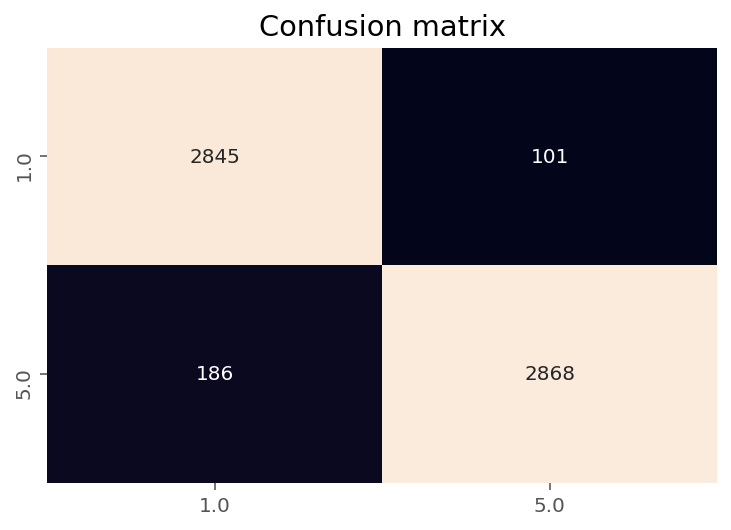

In [124]:
labels = grid_tf_idf.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

C–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ

In [125]:
clf_tf_idf_TruncatedSVD = Pipeline(
    [('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('tsvd', TruncatedSVD()),
     ('clf', LogisticRegression())]
)

params_tf_idf_TruncatedSVD={
    'vect__analyzer': ['word'],
    'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'tsvd__n_components': [5, 10, 25, 50, 100],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1', 'l2']
}

scores=['accuracy','f1']

In [126]:
grid_tf_idf_TruncatedSVD = GridSearchCV(
    clf_tf_idf_TruncatedSVD, 
    param_grid=params_tf_idf_TruncatedSVD, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [127]:
grid_tf_idf_TruncatedSVD.fit(X_train, y_train)

Fitting 3 folds for each of 210 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 85.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 139.3min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 183.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [161]:
# print(grid_tf_idf_TruncatedSVD.best_estimator_)
print("Best score: %0.3f" % grid_tf_idf_TruncatedSVD.best_score_)

Best score: 0.942


In [162]:
predictions=grid_tf_idf_TruncatedSVD.best_estimator_.predict(X_test)

In [163]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.94
Recall:      0.94
F1_score:    0.94
Accuracy:    0.94


In [131]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94      2946
         5.0       0.95      0.93      0.94      3054

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



In [132]:
labels = grid_tf_idf_TruncatedSVD.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

#### 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç

LDA

In [136]:
clf_tf_idf_LDA = Pipeline(
    [('vect', CountVectorizer()),
     ('lda', LatentDirichletAllocation()),
     ('clf', LogisticRegression())]
)

params_tf_idf_LDA={
    'vect__analyzer': ['word'],
    'vect__max_df': [0.75],
    'vect__ngram_range': [(1, 1)],
    'lda__n_components' : [25, 50, 100],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1']
}

scores=['accuracy', 'f1']

In [138]:
grid_tf_idf_LDA = GridSearchCV(
    clf_tf_idf_LDA, 
    param_grid=params_tf_idf_LDA, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [139]:
grid_tf_idf_LDA.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed: 55.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [140]:
# print(grid_tf_idf_LDA.best_estimator_)
print("Best score: %0.3f" % grid_tf_idf_LDA.best_score_)

Best score: 0.912


In [164]:
predictions=grid_tf_idf_LDA.best_estimator_.predict(X_test)

In [165]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.92
Recall:      0.92
F1_score:    0.92
Accuracy:    0.92


In [143]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.91      2946
         5.0       0.93      0.90      0.92      3054

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



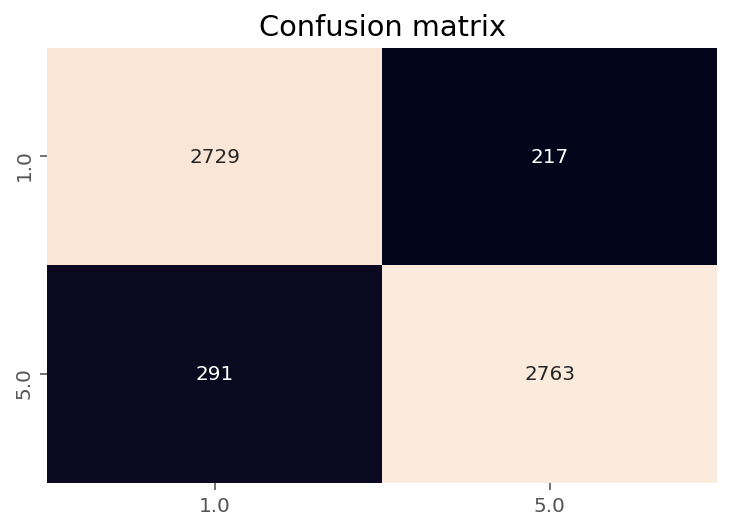

In [144]:
labels = grid_tf_idf_LDA.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

### –ò—Ç–æ–≥–æ:

In [151]:
models=['grid_cntv', 'grid_tf_idf', 'grid_tf_idf_TruncatedSVD', 'grid_tf_idf_LDA']

for model in models:
    print(model[5:])
    predictions=eval(model).best_estimator_.predict(X_test)
    print("f1_score: {0:6.3f}\nAccuracy: {0:6.3f}\n\n".format(
        f1_score(y_test, predictions, average='macro'), 
        accuracy_score(y_test, predictions)))

cntv
f1_score:  0.948
Accuracy:  0.948


tf_idf
f1_score:  0.952
Accuracy:  0.952


tf_idf_TruncatedSVD
f1_score:  0.940
Accuracy:  0.940


tf_idf_LDA
f1_score:  0.915
Accuracy:  0.915




**ùë°ùëì‚àíùëñùëëùëì –Ω–∞–∏–±–æ–ª–µ–µ —É–¥–∞—á–Ω–∞—è –º–æ–¥–µ–ª—å**

In [ ]:
pass